In [1]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [2]:
jazz = 'C:\\Users\\Saad\\Desktop\\Project\\MGC\\Data\\genres_original\\jazz\\jazz.00006.wav'

In [3]:
signal, sample_rate = librosa.load(jazz)

In [4]:
print(signal)

[0.08334351 0.14605713 0.14706421 ... 0.0085144  0.00469971 0.00369263]


In [5]:
print(sample_rate)

22050


Text(0.5, 1.0, 'Waveform')

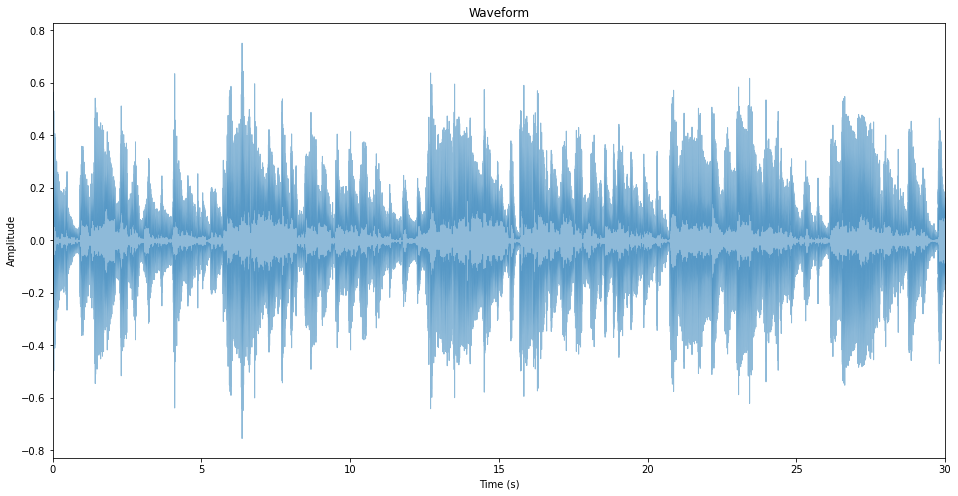

In [6]:
FIG_SIZE = (16,8)
# WAVEFORM
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [7]:
# Fourier Transform (FFT) - Frequency Domain
fft = np.fft.fft(signal)
# Calculate the Magnitude (abs values on complex numbers)
spectrum = np.abs(fft)
# Create the Frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

Text(0.5, 1.0, 'Power Spectrum')

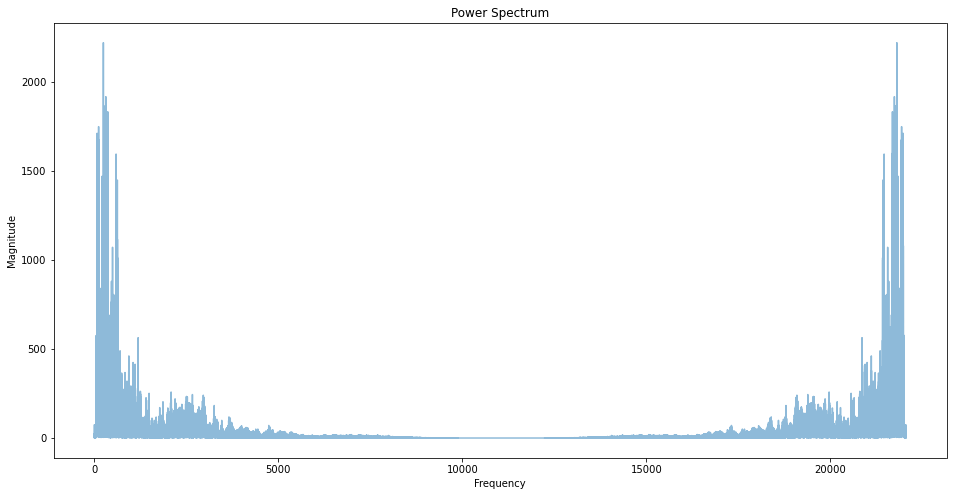

In [8]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(f, spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [9]:
# Take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Power Spectrum')

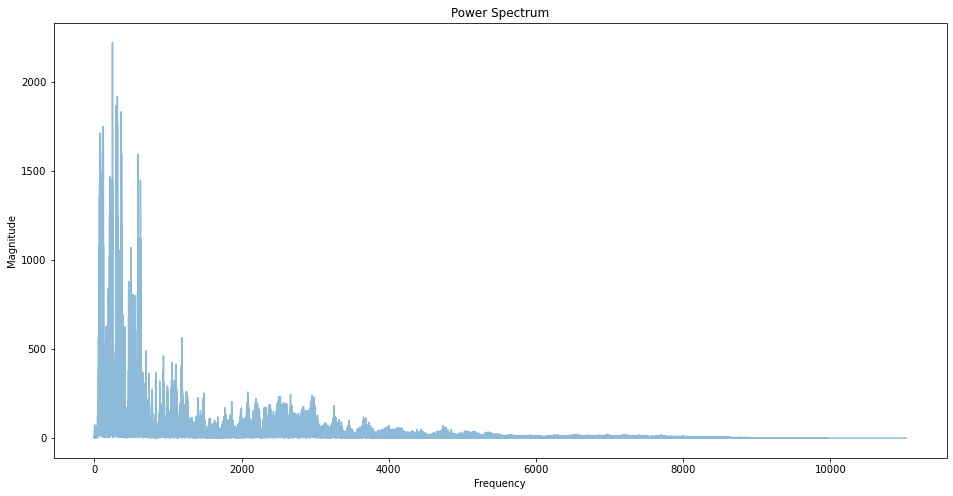

In [10]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [11]:
# Spectrogram (STFT)
hop_length = 512 # num. of samples
n_fft = 2048 # num. of samples for window

In [12]:
# Perform STFT
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [13]:
# Calculate the Magnitude (abs values on complex numbers)
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

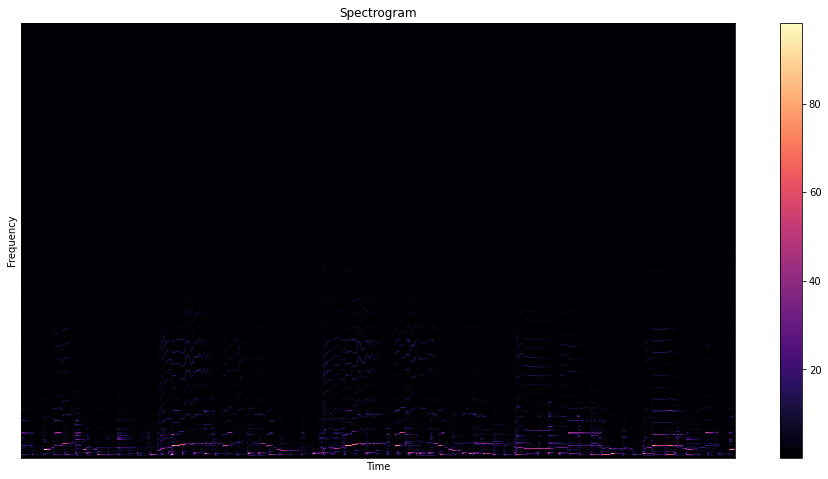

In [14]:
# Plot the Spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [15]:
# Apply Logarithm to get values in Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

Text(0.5, 1.0, 'Spectrogram (dB)')

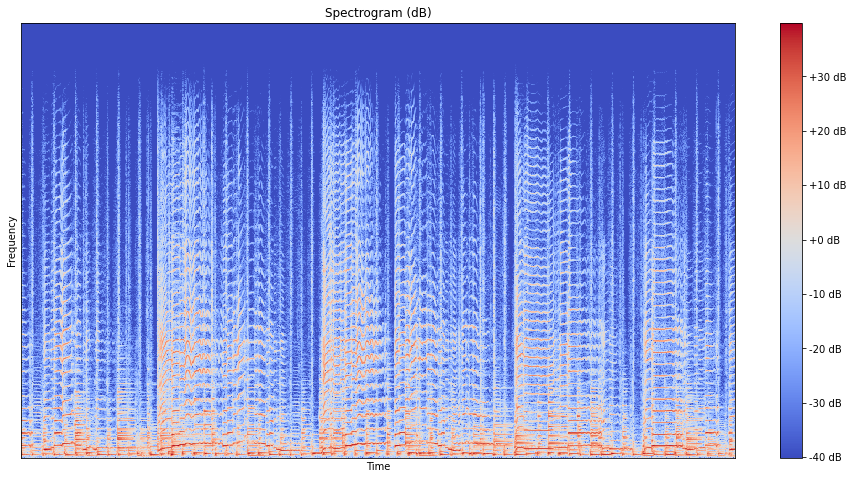

In [16]:
# Plot the Spectrogram in Decibels
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [17]:
# MFCCs 
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

Text(0.5, 1.0, 'MFCCs')

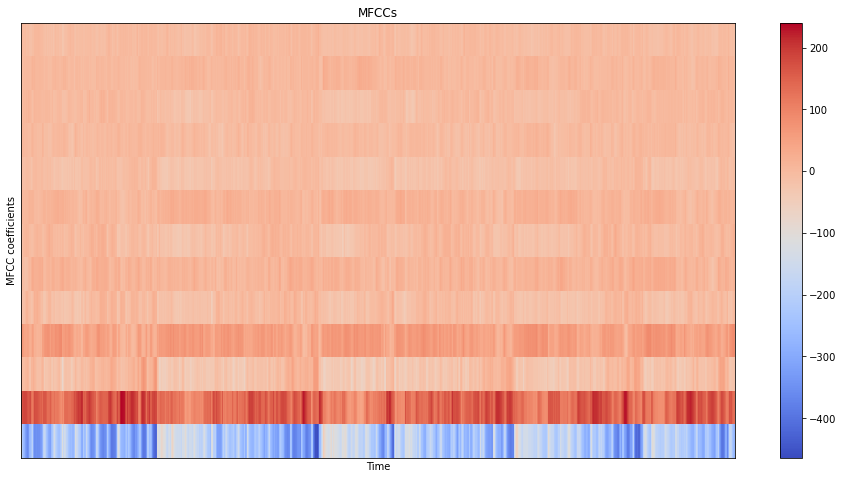

In [18]:
# Plot MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

In [19]:
import json
import os
import math

In [1]:
dataset_path      = "C:\\Users\\Saad\\Desktop\\Project\\MGC\\Data\\genres_original"
json_path         = "C:\\Users\\Saad\\Desktop\\Project\\MGC\\Data\\data.json"
sample_rate       = 22050
track_duration    = 30 
samples_per_track = sample_rate * track_duration

In [2]:
samples_per_track

661500

In [22]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=10):
 
    data = {
        "mapping": [],
        "labels" : [],
        "mfcc"   : []
    }

    samples_per_segment          = int(samples_per_track / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

                file_path           = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=sample_rate)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start  = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        
        
if __name__ == "__main__":
    save_mfcc(dataset_path, json_path, num_segments=10)


Processing: C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00000.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00000.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00000.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00000.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00000.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00000.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00000.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00000.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00000.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00000.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00011.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00011.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00011.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00012.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00012.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00012.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00012.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00012.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00012.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00012.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00012.wav, segment:8
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00023.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00023.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00023.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00024.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00024.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00024.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00024.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00024.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00024.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00024.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00024.wav, segment:8
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00035.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00035.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00035.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00035.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00035.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00036.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00036.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00036.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00036.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00036.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00036.wav, segment:6
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00047.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00047.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00047.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00047.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00047.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00047.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00047.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00047.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00047.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00048.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00048.wav, segment:2
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00059.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00059.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00059.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00059.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00059.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00059.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00059.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00059.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00059.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00059.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00060.wav, segment:1
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00071.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00071.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00071.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00071.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00071.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00071.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00071.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00071.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00072.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00072.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00072.wav, segment:3
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00083.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00083.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00083.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00083.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00083.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00083.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00083.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00084.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00084.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00084.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00084.wav, segment:4
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00095.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00095.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00095.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00095.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00095.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00095.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00096.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00096.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00096.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00096.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\blues\blues.00096.wav, segment:5
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00004.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00004.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00004.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00004.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00004.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00004.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00005.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00005.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00005.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00005.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00013.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00013.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00013.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00013.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00013.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00013.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00014.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00014.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00014.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00014.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00022.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00022.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00022.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00022.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00023.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00023.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00023.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00023.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00023.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00023.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00031.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00031.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00032.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00032.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00032.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00032.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00032.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00032.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00032.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00032.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00040.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00040.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00041.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00041.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00041.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00041.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00041.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00041.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00041.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00041.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00050.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00050.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00050.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00050.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00050.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00050.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00050.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00050.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00051.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00051.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00059.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00059.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00059.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00059.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00059.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00059.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00060.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00060.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00060.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00060.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00068.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00068.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00068.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00068.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00069.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00069.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00069.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00069.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00069.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00069.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00077.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00077.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00077.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00078.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00078.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00078.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00078.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00078.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00078.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00078.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00086.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00087.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00087.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00087.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00087.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00087.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00087.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00087.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00087.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00087.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00096.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00096.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00096.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00096.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00096.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00096.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00096.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00096.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00096.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\classical\classical.00097.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00005.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00005.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00005.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00005.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00005.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00005.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00005.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00005.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00005.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00006.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00006.wa

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00015.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00015.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00015.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00015.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00015.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00015.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00015.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00015.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00016.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00016.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00016.wa

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00024.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00024.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00024.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00024.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00024.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00024.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00025.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00025.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00025.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00025.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00025.wa

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00033.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00033.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00033.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00033.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00033.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00033.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00034.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00034.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00034.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00034.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00034.wa

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00042.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00042.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00042.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00042.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00042.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00042.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00043.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00043.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00043.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00043.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00043.wa

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00051.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00051.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00051.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00051.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00051.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00052.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00052.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00052.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00052.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00052.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00052.wa

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00060.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00061.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00061.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00061.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00061.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00061.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00061.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00061.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00061.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00061.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00061.wa

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00072.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00072.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00072.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00073.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00073.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00073.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00073.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00073.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00073.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00073.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00073.wa

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00081.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00081.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00082.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00082.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00082.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00082.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00082.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00082.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00082.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00082.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00082.wa

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00090.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00090.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00090.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00091.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00091.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00091.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00091.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00091.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00091.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00091.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00091.wa

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\country\country.00099.wav, segment:10

Processing: C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00000.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00000.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00000.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00000.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00000.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00000.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00000.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00000.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00000.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\ge

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00011.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00012.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00012.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00012.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00012.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00012.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00012.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00012.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00012.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00012.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00012.wav, segment:10
C:\Users\Saad\Desktop\Project\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00024.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00024.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00024.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00024.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00024.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00024.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00024.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00024.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00025.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00025.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00025.wav, segment:3
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00036.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00036.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00036.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00036.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00036.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00036.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00037.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00037.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00037.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00037.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00037.wav, segment:5
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00048.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00048.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00048.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00049.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00049.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00049.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00049.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00049.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00049.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00049.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00049.wav, segment:8
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00061.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00061.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00061.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00061.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00061.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00061.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00061.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00061.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00061.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00061.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00062.wav, segment:1
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00073.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00073.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00073.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00073.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00073.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00073.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00073.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00074.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00074.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00074.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00074.wav, segment:4
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00082.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00082.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00082.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00082.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00083.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00083.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00083.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00083.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00083.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00083.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00083.wav, segment:7
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00091.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00092.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00092.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00092.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00092.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00092.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00092.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00092.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00092.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00092.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\disco\disco.00092.wav, segment:10
C:\Users\Saad\Desktop\Project\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00001.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00001.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00001.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00001.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00001.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00001.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00001.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00001.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00001.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00002.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00002.wav, segment:2
C:\Users\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00013.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00013.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00013.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00013.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00013.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00013.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00013.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00013.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00013.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00014.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00014.wav, segment:2
C:\Users\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00022.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00022.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00022.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00022.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00022.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00022.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00023.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00023.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00023.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00023.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00023.wav, segment:5
C:\Users\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00031.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00031.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00031.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00031.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00032.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00032.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00032.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00032.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00032.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00032.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00032.wav, segment:7
C:\Users\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00043.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00043.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00043.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00043.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00044.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00044.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00044.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00044.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00044.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00044.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00044.wav, segment:7
C:\Users\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00054.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00054.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00054.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00054.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00054.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00054.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00054.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00055.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00055.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00055.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00055.wav, segment:4
C:\Users\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00063.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00063.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00063.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00063.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00063.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00063.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00064.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00064.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00064.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00064.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00064.wav, segment:5
C:\Users\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00075.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00075.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00075.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00075.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00075.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00075.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00075.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00075.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00076.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00076.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00076.wav, segment:3
C:\Users\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00086.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00086.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00086.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00086.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00086.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00086.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00086.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00087.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00087.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00087.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00087.wav, segment:4
C:\Users\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00097.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00097.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00097.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00097.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00097.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00097.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00097.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00098.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00098.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00098.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\hiphop\hiphop.00098.wav, segment:4
C:\Users\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00008.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00008.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00008.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00008.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00008.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00008.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00008.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00008.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00008.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00009.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00009.wav, segment:2
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00018.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00018.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00019.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00019.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00019.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00019.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00019.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00019.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00019.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00019.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00019.wav, segment:9
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00029.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00029.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00029.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00029.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00029.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00029.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00029.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00029.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00030.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00030.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00030.wav, segment:3
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00039.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00039.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00039.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00039.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00039.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00039.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00040.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00040.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00040.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00040.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00040.wav, segment:5
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00049.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00049.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00049.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00049.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00049.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00049.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00049.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00049.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00050.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00050.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00050.wav, segment:3
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00060.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00060.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00060.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00060.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00060.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00060.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00060.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00060.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00060.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00061.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00061.wav, segment:2
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00071.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00071.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00071.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00071.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00071.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00071.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00071.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00072.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00072.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00072.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00072.wav, segment:4
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00082.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00082.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00082.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00082.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00082.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00082.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00083.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00083.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00083.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00083.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00083.wav, segment:5
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00093.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00093.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00093.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00093.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00093.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00093.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00093.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00094.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00094.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00094.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\metal\metal.00094.wav, segment:4
C:\Users\Saad\Desktop\Project\M

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00004.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00004.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00004.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00004.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00005.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00005.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00005.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00005.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00005.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00005.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00005.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00005.wav, s

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00015.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00015.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00015.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00015.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00015.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00016.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00016.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00016.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00016.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00016.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00016.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00016.wav, s

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00026.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00027.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00027.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00027.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00027.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00027.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00027.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00027.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00027.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00027.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00027.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00028.wav, 

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00037.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00037.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00037.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00037.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00037.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00037.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00037.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00037.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00038.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00038.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00038.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00038.wav, s

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00047.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00047.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00047.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00048.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00048.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00048.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00048.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00048.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00048.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00048.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00048.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00048.wav, s

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00058.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00058.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00058.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00058.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00058.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00058.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00058.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00058.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00058.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00059.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00059.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00059.wav, s

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00069.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00069.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00069.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00069.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00069.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00069.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00069.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00070.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00070.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00070.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00070.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00070.wav, s

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00081.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00081.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00081.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00081.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00081.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00081.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00081.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00082.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00082.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00082.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00082.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00082.wav, s

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00092.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00092.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00092.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00092.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00092.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00092.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00092.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00092.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00092.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00092.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00093.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\pop\pop.00093.wav, s

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00002.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00003.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00003.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00003.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00003.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00003.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00003.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00003.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00003.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00003.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00003.wav, segment:10
C:\Users

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00014.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00014.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00014.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00014.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00014.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00014.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00014.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00014.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00014.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00015.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00015.wav, segment:2
C:\Users\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00025.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00025.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00025.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00025.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00025.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00026.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00026.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00026.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00026.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00026.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00026.wav, segment:6
C:\Users\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00036.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00037.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00037.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00037.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00037.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00037.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00037.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00037.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00037.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00037.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00037.wav, segment:10
C:\Users

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00047.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00047.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00047.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00047.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00047.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00047.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00047.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00048.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00048.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00048.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00048.wav, segment:4
C:\Users\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00058.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00058.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00058.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00058.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00058.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00059.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00059.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00059.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00059.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00059.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00059.wav, segment:6
C:\Users\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00069.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00069.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00070.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00070.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00070.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00070.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00070.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00070.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00070.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00070.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00070.wav, segment:9
C:\Users\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00081.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00081.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00081.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00081.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00081.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00081.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00081.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00081.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00081.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00081.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00082.wav, segment:1
C:\Users\

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00091.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00092.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00092.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00092.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00092.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00092.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00092.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00092.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00092.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00092.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\reggae\reggae.00092.wav, segment:10
C:\Users

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00002.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00002.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00002.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00002.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00002.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00002.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00003.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00003.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00003.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00003.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00003.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_origina

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00013.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00013.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00013.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00013.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00013.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00013.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00013.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00013.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00013.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00014.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00014.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_origina

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00023.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00023.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00024.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00024.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00024.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00024.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00024.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00024.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00024.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00024.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00024.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_origina

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00033.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00033.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00033.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00033.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00034.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00034.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00034.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00034.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00034.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00034.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00034.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_origina

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00043.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00043.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00043.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00044.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00044.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00044.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00044.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00044.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00044.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00044.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00044.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_origina

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00054.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00054.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00054.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00054.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00054.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00054.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00054.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00055.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00055.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00055.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00055.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_origina

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00065.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00065.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00065.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00065.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00065.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00065.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00066.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00066.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00066.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00066.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00066.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_origina

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00076.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00076.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00076.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00076.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00076.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00076.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00077.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00077.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00077.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00077.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00077.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_origina

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00086.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00086.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00086.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00086.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00086.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00087.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00087.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00087.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00087.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00087.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00087.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_origina

C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00096.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00096.wav, segment:4
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00096.wav, segment:5
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00096.wav, segment:6
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00096.wav, segment:7
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00096.wav, segment:8
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00096.wav, segment:9
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00096.wav, segment:10
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00097.wav, segment:1
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00097.wav, segment:2
C:\Users\Saad\Desktop\Project\MGC\Data\genres_original\rock\rock.00097.wav, segment:3
C:\Users\Saad\Desktop\Project\MGC\Data\genres_origina